In [1]:
cd ..

/Users/flamholz/Documents/workspace/ccm_evolution


In [2]:
mkdir -p figures/fig5

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from statannot import add_stat_annotation

In [4]:
# ODs data are already blanked 
endpoint_df = pd.read_excel('data/Reutropha/062021_JP_Reutropha_endpoint.xlsx')
endpoint_df['CO2_str'] = ['{0:.2g}%'.format(100*v) for v in endpoint_df['CO2']]
endpoint_df.head()

,strain_name,strain,plasmid,CO2,inducer,induction,time_hrs,OD550,OD600,CO2_str
0,WT:pRFP,WT,pRFP,0.0005,arabinose,0,48,0.059,0.05074,0.05%
1,WT:pRFP,WT,pRFP,0.0005,arabinose,0,48,0.067,0.05762,0.05%
2,WT:pRFP,WT,pRFP,0.0005,arabinose,0,48,0.086,0.07396,0.05%
3,WT:pRFP,WT,pRFP,0.0005,arabinose,0,48,0.118,0.10148,0.05%
4,WT:pRFP,WT,pRFP,0.0005,arabinose,0,48,0.107,0.09202,0.05%


In [5]:
print('mean ODs')
display(endpoint_df.groupby(['strain_name', 'CO2']).mean())
print
print('stddev ODs')
display(endpoint_df.groupby(['strain_name', 'CO2']).std())

mean ODs


induction  time_hrs     OD550     OD600
strain_name     CO2                                            
WT:pRFP         0.0005          0        48  0.090167  0.077543
                0.0050          0        48  0.455167  0.391443
                0.0150          0        48  0.854333  0.734727
                0.0500          0        48  0.644333  0.554127
WT:pdab2        0.0005          0        48  0.092333  0.079407
                0.0050          0        48  0.476667  0.409933
                0.0150          0        48  1.473333  1.267067
                0.0500          0        48  1.261333  1.084747
∆caa∆can:pHCAII 0.0005          0        48  0.095667  0.082273
                0.0050          0        48  0.374667  0.322213
                0.0150          0        48  1.624000  1.396640
                0.0500          0        48  1.652000  1.420720
∆caa∆can:pRFP   0.0005          0        48  0.036333  0.031247
                0.0050          0        48  0.016000  0.013760
                0.0150          0        48  0.269333  0.231627
                0.0500          0        48  1.840000  1.582400
∆caa∆can:pdab2  0.0005          0        48  0.161333  0.138747
                0.0050          0        48  0.432000  0.371520
                0.0150          0        48  1.767000  1.519620
                0.0500          0        48  2.157333  1.855307

stddev ODs


induction  time_hrs     OD550     OD600
strain_name     CO2                                            
WT:pRFP         0.0005        0.0       0.0  0.023558  0.020260
                0.0050        0.0       0.0  0.046041  0.039595
                0.0150        0.0       0.0  0.220546  0.189670
                0.0500        0.0       0.0  0.150149  0.129128
WT:pdab2        0.0005        0.0       0.0  0.004619  0.003972
                0.0050        0.0       0.0  0.021197  0.018230
                0.0150        0.0       0.0  0.321853  0.276794
                0.0500        0.0       0.0  0.158004  0.135884
∆caa∆can:pHCAII 0.0005        0.0       0.0  0.011060  0.009512
                0.0050        0.0       0.0  0.004726  0.004064
                0.0150        0.0       0.0  0.101926  0.087657
                0.0500        0.0       0.0  0.190284  0.163644
∆caa∆can:pRFP   0.0005        0.0       0.0  0.004619  0.003972
                0.0050        0.0       0.0  0.010583  0.009101
                0.0150        0.0       0.0  0.198558  0.170760
                0.0500        0.0       0.0  0.136470  0.117364
∆caa∆can:pdab2  0.0005        0.0       0.0  0.016073  0.013823
                0.0050        0.0       0.0  0.031097  0.026743
                0.0150        0.0       0.0  0.194515  0.167283
                0.0500        0.0       0.0  0.336721  0.289580

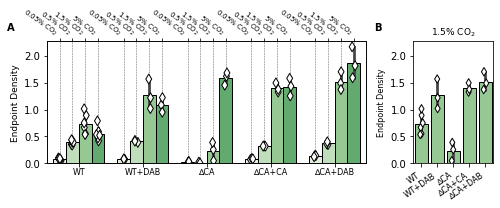

In [6]:
fig, axs = plt.subplots(figsize=(7,3), ncols=2, gridspec_kw=dict(width_ratios=[4,1]))
greys = sns.color_palette('Greys')
greens = sns.color_palette('Greens')

plt.sca(axs[0])
CO2_order = '0.05%,0.5%,1.5%,5%'.split(',')
strain_order = 'WT:pRFP,WT:pdab2,∆caa∆can:pRFP,∆caa∆can:pHCAII,∆caa∆can:pdab2'.split(',')
strain_titles = 'WT,WT+DAB,∆CA,∆CA+CA,∆CA+DAB'.split(',')
ax = sns.barplot(data=endpoint_df, y='OD600', x='strain_name', hue='CO2_str',
                 order=strain_order, hue_order=CO2_order,
                 dodge=0.5, edgecolor='k', palette=greens)

strip_pal = ['w']*4
sns.stripplot(data=endpoint_df, y='OD600', x='strain_name', hue='CO2_str',
              order=strain_order, hue_order=CO2_order, dodge=0.5,
              size=7, marker='d', edgecolor='k', linewidth=1, palette=strip_pal)

xlocs = np.arange(len(strain_titles))
xlim, ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.xticks(xlocs, strain_titles, fontsize=8, va='center')
plt.tick_params(axis='x', which='major', pad=5)
plt.xlabel('')
plt.ylabel('Endpoint Density', fontsize=9)
plt.ylim(0, ylim[1])
plt.legend().set_visible(False)

axs[0].text(-0.1, 1.15, 'A', transform=axs[0].transAxes,
      fontsize=10, fontweight='bold', va='top', ha='right')
xticks = np.arange(0, 0.8, 0.2) - 0.3
xticks = np.hstack([xticks, xticks+1, xticks+2, xticks+3, xticks+4])
xtick_str = '0.05% CO$_2$,0.5% CO$_2$,1.5% CO$_2$,5% CO$_2$'.split(',')*5
for xpos in xticks:
    plt.axvline(xpos, ls='--', lw=0.5, zorder=-1, color=greys[-2])

axT = ax.twiny()
plt.sca(axT)
plt.xticks(xticks, xtick_str, ha='right', rotation=-35, fontsize=7)
plt.tick_params(pad=0)
plt.xlim(xlim)

plt.sca(axs[1])
mask = endpoint_df['CO2_str'] == "1.5%"
sub_df = endpoint_df[mask]
sns.barplot(data=sub_df,
            x='strain_name', y='OD600', 
            order=strain_order,
            dodge=0.25, edgecolor='k', color=greens[2])
sns.stripplot(data=sub_df,
              x='strain_name', y='OD600', 
              order=strain_order, dodge=0.25,
              size=6, marker='d', edgecolor='k', linewidth=1, palette=strip_pal)

axs[1].text(-0.39, 1.15, 'B', transform=axs[1].transAxes,
      fontsize=10, fontweight='bold', va='top', ha='right')
plt.title('1.5% CO$_2$', fontsize=9)
plt.xticks(xlocs, strain_titles, fontsize=8, ha='right', rotation=35)
plt.ylim(0, ylim[1])
plt.xlabel('')
plt.ylabel('Endpoint Density', fontsize=8)

plt.tight_layout()
plt.savefig('figures/fig5/fig5.png', dpi=600, facecolor='w')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

∆caa∆can:pRFP v.s. ∆caa∆can:pHCAII: Welch's t-test independent samples with Bonferroni correction, P_val=8.829e-05 stat=-5.360e+01
WT:pRFP v.s. ∆caa∆can:pRFP: Welch's t-test independent samples with Bonferroni correction, P_val=1.794e-06 stat=2.222e+01
∆caa∆can:pRFP v.s. ∆caa∆can:pdab2: Welch's t-test independent samples with Bonferroni correction, P_val=2.103e-03 stat=-2.194e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

∆caa∆can:pRFP v.s. ∆caa∆can:pHCAII: Welch's t-test independent samples with Bonferroni correction, P_val=5.632e-03 stat=-1.051e+01
WT:pRFP v.s. ∆caa∆can:pRFP: Welch's t-test independent samples with Bonferroni correction, P_val=3.720e-02 stat=4.013e+00
∆caa∆can:pRFP v.s. ∆caa∆can:pdab2: W

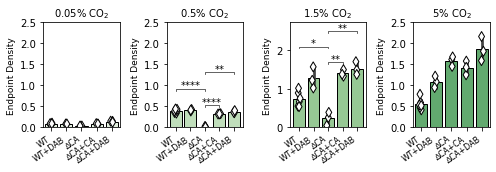

In [7]:
fig, axs = plt.subplots(figsize=(7,2.5), ncols=4)
greys = sns.color_palette('Greys')
greens = sns.color_palette('Greens')

CO2_order = '0.05%,0.5%,1.5%,5%'.split(',')
co2_titles = '0.05% CO$_2$,0.5% CO$_2$,1.5% CO$_2$,5% CO$_2$'.split(',')

strain_order = 'WT:pRFP,WT:pdab2,∆caa∆can:pRFP,∆caa∆can:pHCAII,∆caa∆can:pdab2'.split(',')
strain_titles = 'WT,WT+DAB,∆CA,∆CA+CA,∆CA+DAB'.split(',')

# Meaningful comparisons for the statistical tests are:
# WT - CA deletion.
# CA deletion - CA complement
# CA deletion - DAB complement
pair_idxs = [(0,2), (2,3), (2,4)]
pairs = [(strain_order[i], strain_order[j]) for (i,j) in pair_idxs]

for i, (co2_cond, ax) in enumerate(zip(CO2_order, axs)):
    plt.sca(ax)
    
    mask = endpoint_df['CO2_str'] == co2_cond
    sub_df = endpoint_df[mask]
    sns.barplot(data=sub_df, y='OD600', x='strain_name', 
                order=strain_order, dodge=0.5, edgecolor='k', color=greens[i])

    strip_pal = ['w']*len(strain_order)
    sns.stripplot(data=sub_df, y='OD600', x='strain_name',
                  order=strain_order, dodge=0.5, size=7, marker='d',
                  edgecolor='k', linewidth=1, palette=strip_pal)

    plt.ylabel('Endpoint Density', fontsize=9)
    plt.title(co2_titles[i], fontsize=10)
    plt.xlabel('')
    xlocs = np.arange(len(strain_titles))
    plt.xticks(xlocs, strain_titles, rotation=35, ha='right', fontsize=8)
    plt.ylim(0,2.5)

    # Statistical comparison - do one CO2 cond at a time.
    # Only really made a prediction for intermediate pCO2.
    if co2_cond in '0.5%,1.5%'.split(','):
        test_results = add_stat_annotation(
            ax, data=sub_df, y='OD600', x='strain_name', 
            order=strain_order,
            box_pairs=pairs,
            test='t-test_welch', 
            text_format='star', text_offset=-2,
            line_height=0.02, line_offset=0.08, linewidth=0.75,
            loc='inside', verbose=2)

plt.tight_layout()
plt.savefig('figures/fig5/fig5S1_stats.png', dpi=600, facecolor='w')
plt.show()

In [8]:
# Kinetic data at 10% CO2.
# TODO: should we plot this in the SI? Not sure it adds anything.
kin_df = pd.read_excel('data/Reutropha/JP_Reutropha_kinetics_10pctCO2.xlsx')